In [1]:
import os
# from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
from scipy import signal
import datetime
import configparser

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import BoundaryNorm, LogNorm
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

import lidar_processor

plt.style.use('latex_default.mplstyle')

In [8]:
"""SAAMER"""
saamer_file_path = "/export/data/SAAMER/SAAMER_Hindley22_version_2018.nc"
ds = xr.open_dataset(saamer_file_path)
ds

<xarray.Dataset>
Dimensions:          (time: 8760, altitude: 30)
Coordinates:
  * time             (time) float64 0.0 0.04167 0.08333 ... 364.9 364.9 365.0
  * altitude         (altitude) float64 76.0 77.0 78.0 ... 103.0 104.0 105.0
Data variables:
    zonal_wind       (altitude, time) float64 ...
    meridional_wind  (altitude, time) float64 ...
Attributes:
    data_source:        SAAMER
    category:           Ground-based Meteor Radar
    latitude:           -53.7
    longitude:          292.3
    date_last_revised:  2022-12-14
    created_by:         Neil Hindley
    comment:            Horizontal wind data determined by means of the Gauss...
    year:               2018
    surface_altitude:   21m

In [9]:
# base_date = np.datetime64('2018-01-01')
base_date = datetime.datetime(2018,1,1,0,0)
datetime_index = [base_date + datetime.timedelta(days=int(ts), minutes=(ts-int(ts))*24*60) for ts in ds['time'].values]
ds = ds.assign_coords(time=datetime_index)
ds

<xarray.Dataset>
Dimensions:          (altitude: 30, time: 8760)
Coordinates:
  * altitude         (altitude) float64 76.0 77.0 78.0 ... 103.0 104.0 105.0
  * time             (time) datetime64[ns] 2018-01-01 ... 2018-12-31T23:00:00
Data variables:
    zonal_wind       (altitude, time) float64 ...
    meridional_wind  (altitude, time) float64 ...
Attributes:
    data_source:        SAAMER
    category:           Ground-based Meteor Radar
    latitude:           -53.7
    longitude:          292.3
    date_last_revised:  2022-12-14
    created_by:         Neil Hindley
    comment:            Horizontal wind data determined by means of the Gauss...
    year:               2018
    surface_altitude:   21m

In [3]:
ds = xr.open_dataset("/export/data/eulag-twomtn/test-data/tapes.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (t: 2, z: 251, y: 480, x: 640)
Dimensions without coordinates: t, z, y, x
Data variables:
    time       (t) float32 ...
    u          (t, z, y, x) float32 ...
    v          (t, z, y, x) float32 ...
    w          (t, z, y, x) float32 ...
    th         (t, z, y, x) float32 ...
    p          (t, z, y, x) float32 ...
    ELEVATION  (z, y, x) float32 ...

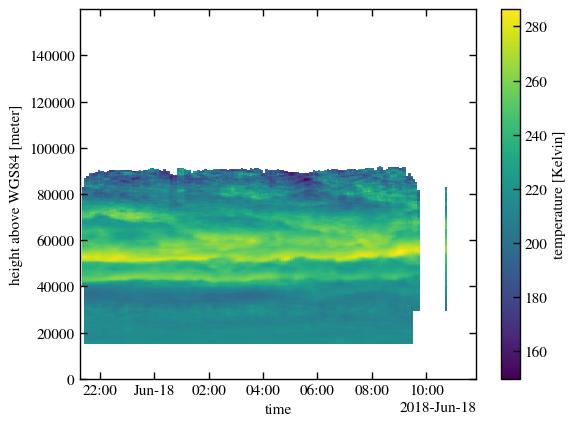

In [2]:
config = configparser.ConfigParser()
config.read("./coral.ini")
ds = lidar_processor.open_and_decode_lidar_measurement("/export/data/malidar/tana/Southwave/v14combined/20180617-2101_T15Z900.nc")
ds = lidar_processor.process_lidar_measurement(config, ds)
ds['temperature'].T.plot()

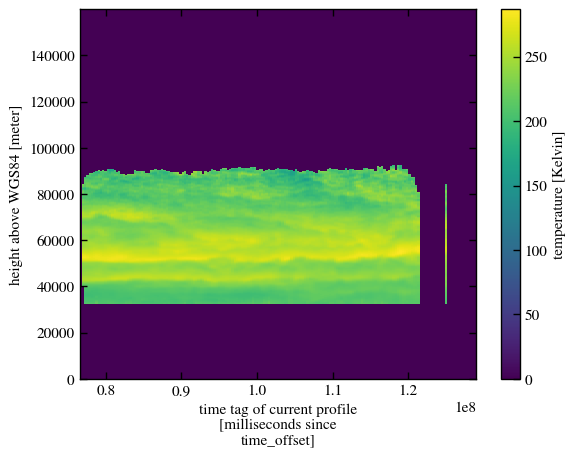

In [3]:
"""CORAL datasets"""
ds = xr.open_dataset("/export/data/malidar/tana/Southwave/v17combined/20180617-2101_T15Z900.nc", decode_times=False)
ds['temperature'].T.plot()

In [7]:
"""TELMA daily datasets"""
ds = xr.open_dataset("/export/data/malidar/tana/Southpole/v18daily/20180617-2101.nc")
ds['temperature'].T.plot()

FileNotFoundError: [Errno 2] No such file or directory: '/export/data/malidar/tana/Southpole/v18daily/20180617-2101.nc'

In [4]:
ds = xr.open_dataset("output/coral/era5-profiles/20220617-2243-ml.nc")
ds

FileNotFoundError: [Errno 2] No such file or directory: '/export/data/ma-lidar-visualizations/output/coral/era5-profiles/20220617-2243-ml.nc'